In [104]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [153]:
from PFNExperiments.LinearRegression.GenerativeModels.Curriculum import Curriculum
from PFNExperiments.LinearRegression.GenerativeModels.GenerateDataCurriculumCFM import GenerateDataCurriculumCFM
from PFNExperiments.LinearRegression.Models.Transformer_CNF import TransformerCNFConditionalDecoder
from PFNExperiments.Training.FlowMatching.CFMLossOT2 import CFMLossOT2
from PFNExperiments.LatentFactorModels.Training.TrainerCurriculumCNF_LatentFactor import TrainerCurriculumCNF_LatentFactor
import torch
from torch.optim.lr_scheduler import ReduceLROnPlateau, OneCycleLR
from PFNExperiments.LinearRegression.Models.ModelToPosteriorCNF import ModelToPosteriorCNF
from PFNExperiments.LatentFactorModels.ComparisonModels.Hamiltionian_MC import Hamiltionian_MC
from PFNExperiments.Evaluation.Evaluate import Evaluate, results_dict_to_data_x_tuple, result_dict_to_latent_variable_convert_mu_sigma_to_beta

In [123]:
from PFNExperiments.LatentFactorModels.GenerativeModels.Clustering.GMMs import make_gmm_program_univariate, make_gmm_program_univariate_batched
from PFNExperiments.LatentFactorModels.GenerativeModels.LatenFactorModel_abstract import return_only_x


In [107]:
N = 10
P = 4
BATCH_SIZE = 1024
N_EPOCHS = 100
N_SAMPLES_PER_EPOCH = 500_000
N_BATCHES_PER_EPOCH = N_SAMPLES_PER_EPOCH//BATCH_SIZE

In [108]:
curriculum = Curriculum(max_iter=int(N_EPOCHS*N_BATCHES_PER_EPOCH*BATCH_SIZE*0.5))
curriculum.add_param_list([
    ("n", curriculum.constant_scheduler(N)),
    ("p", curriculum.constant_scheduler(P)),
    ("batch_size", curriculum.constant_scheduler(BATCH_SIZE)),
    ("a1", curriculum.constant_scheduler(5.0)),
    ("b1", curriculum.constant_scheduler(2.0)),
    ("dirichlet_beta", curriculum.constant_scheduler(1.0)),
    ("lambda1", curriculum.constant_scheduler(3.0))
])
#curriculum.plot_all_schedules()

In [109]:
data_generator = GenerateDataCurriculumCFM(
    pprogram_maker= make_gmm_program_univariate_batched,
    curriculum= curriculum,
)

pprogram_covariates_train is None, using pprogram_covariates instead
pprogram_covariates_val is None, using pprogram_covariates instead
pprogram_covariates_test is None, using pprogram_covariates instead


In [110]:
epoch_loader = data_generator.make_epoch_loader(
    n = N,
    p = P,
    number_of_batches_per_epoch = N_BATCHES_PER_EPOCH,
    n_epochs = N_EPOCHS,
    batch_size= BATCH_SIZE,
    train_frac= 0.5,
    val_frac= 0.1,
    shuffle=False,
    n_samples_to_generate_at_once = 250_000
    )

The number of batches times the number of epochs must be equal to the total number of iterations in the curriculum. But got 49971200 and 24985600 respectively


In [111]:
sample_batch = next(iter(epoch_loader[0][0]))

####################################################################################################
Epoch 0


100%|██████████| 10/10 [00:00<00:00, 55.41it/s]


{'X': {'mean': tensor(0.0021), 'variance': tensor(3.8027), 'min': tensor(-16.0052), 'max': tensor(23.5042), 'mean_mean': tensor([0.0021]), 'variance_mean': tensor([2.3597]), 'min_mean': None, 'max_mean': None}, 'beta': {'mean': tensor(0.2531), 'variance': tensor(1.6725), 'min': tensor(-21.9935), 'max': tensor(23.9588), 'mean_mean': tensor(0.2531), 'variance_mean': tensor(1.7396), 'min_mean': None, 'max_mean': None}}
Statistics for phi:
Mean: tensor([0.2530, 0.2499, 0.2487, 0.2483])
Variance: tensor([0.0380, 0.0374, 0.0373, 0.0381])
Min: tensor([4.5183e-05, 6.1203e-05, 2.0661e-04, 6.0814e-05])
Max: tensor([0.9196, 0.9529, 0.9068, 0.9591])
Mean of means: 0.25
Mean of variances: 0.0502389557659626
Mean of minimums: None
Mean of maximums: None


Statistics for mu:
Mean: tensor([ 0.0007,  0.0187, -0.0271,  0.0223])
Variance: tensor([3.5291, 3.1521, 3.1111, 3.2186])
Min: tensor([-15.3370,  -9.8389, -21.9935, -14.9864])
Max: tensor([21.3402, 13.8737,  9.7687, 23.9588])
Mean of means: 0.003622

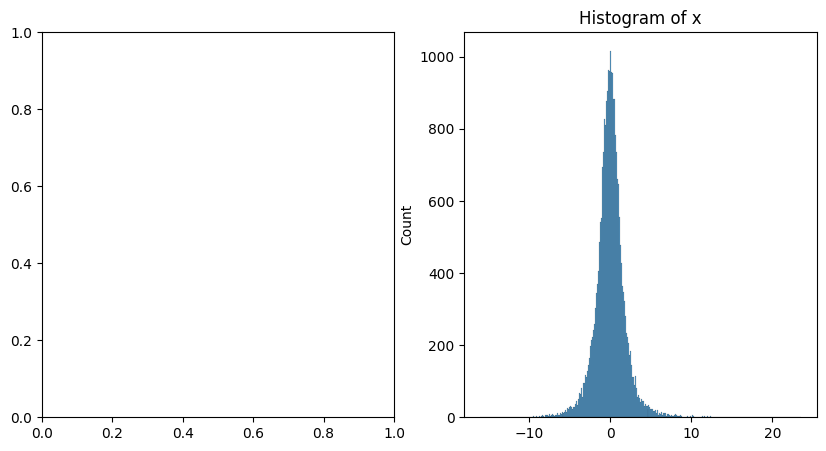

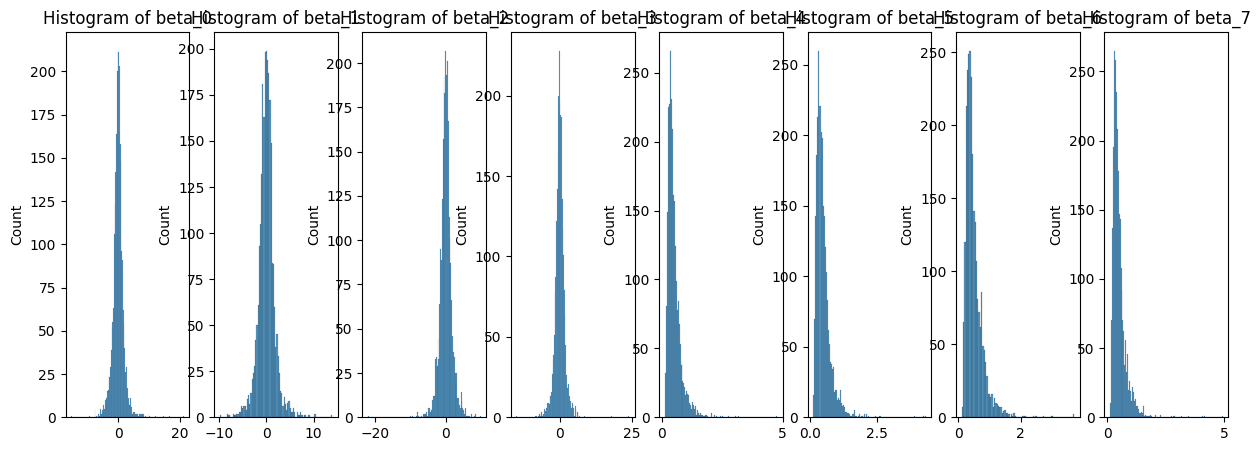

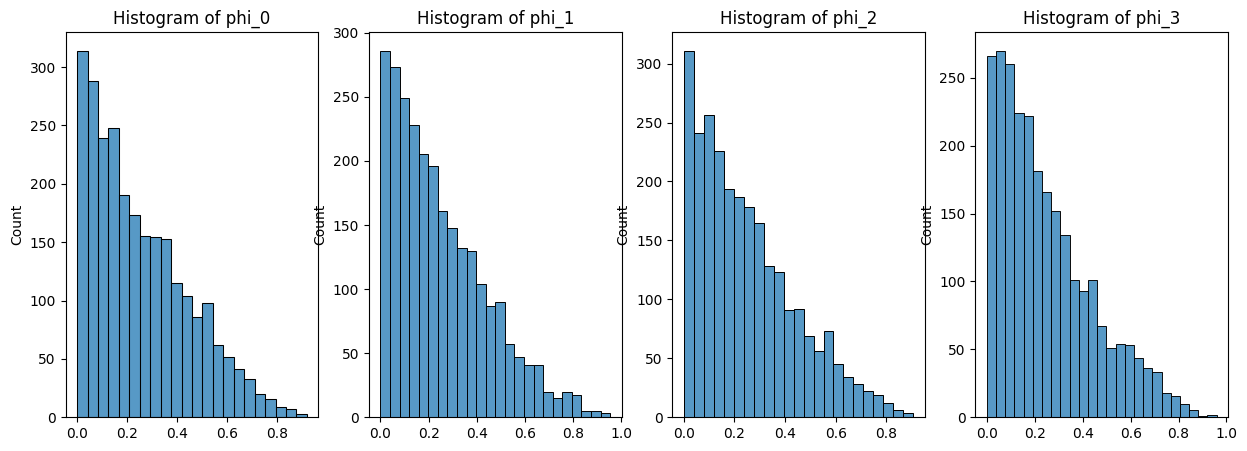

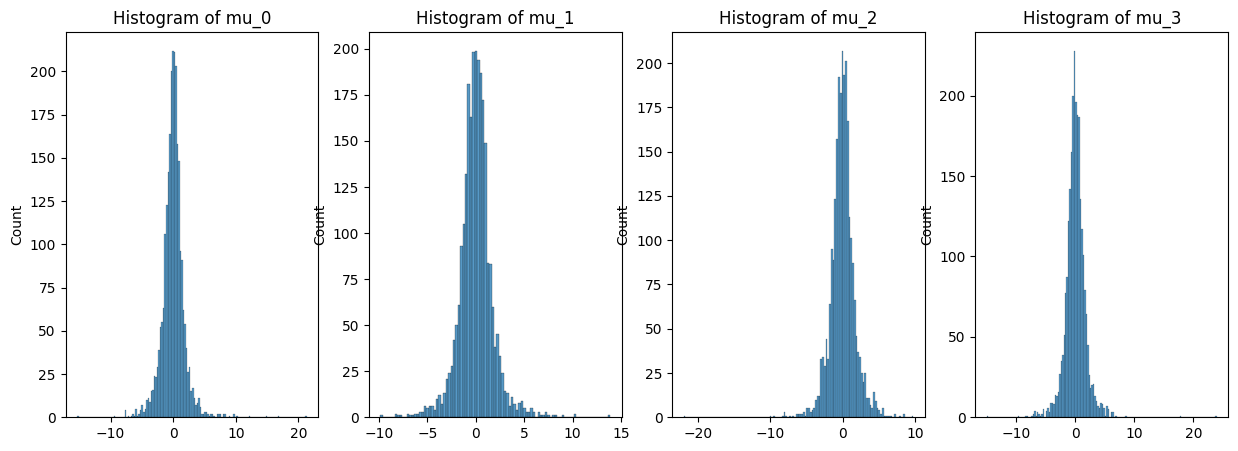

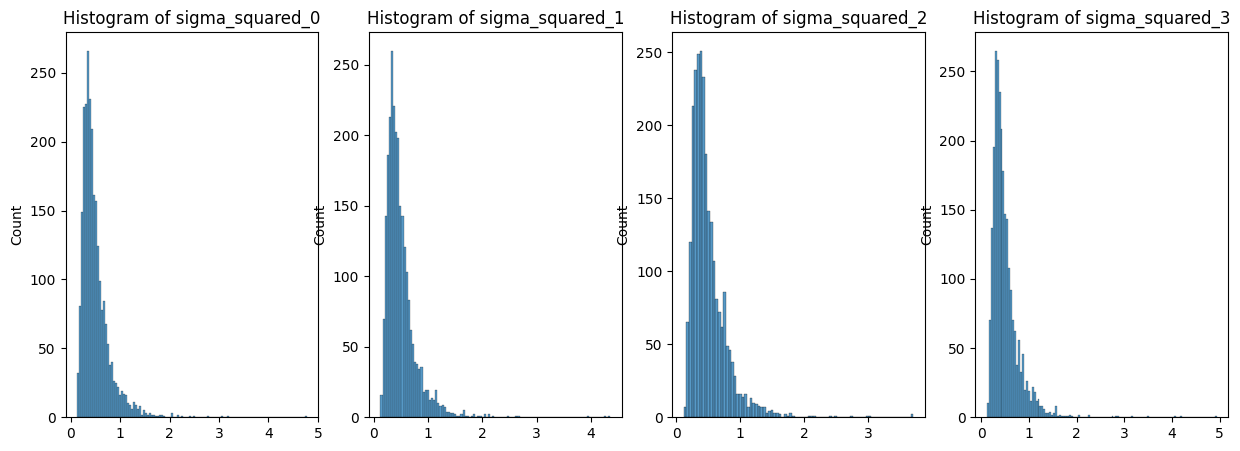

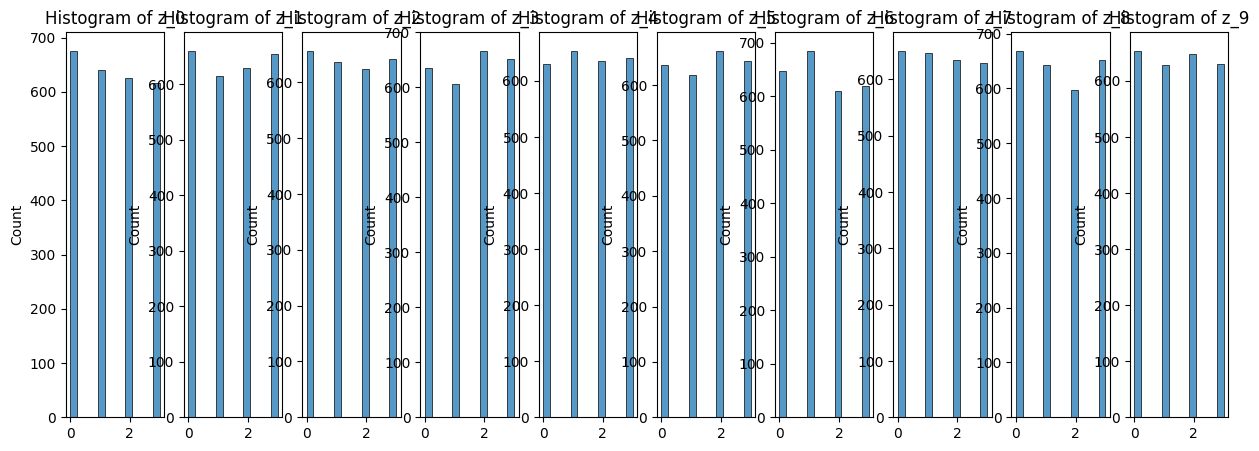

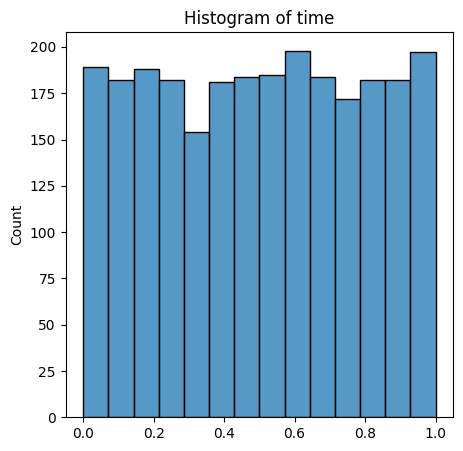

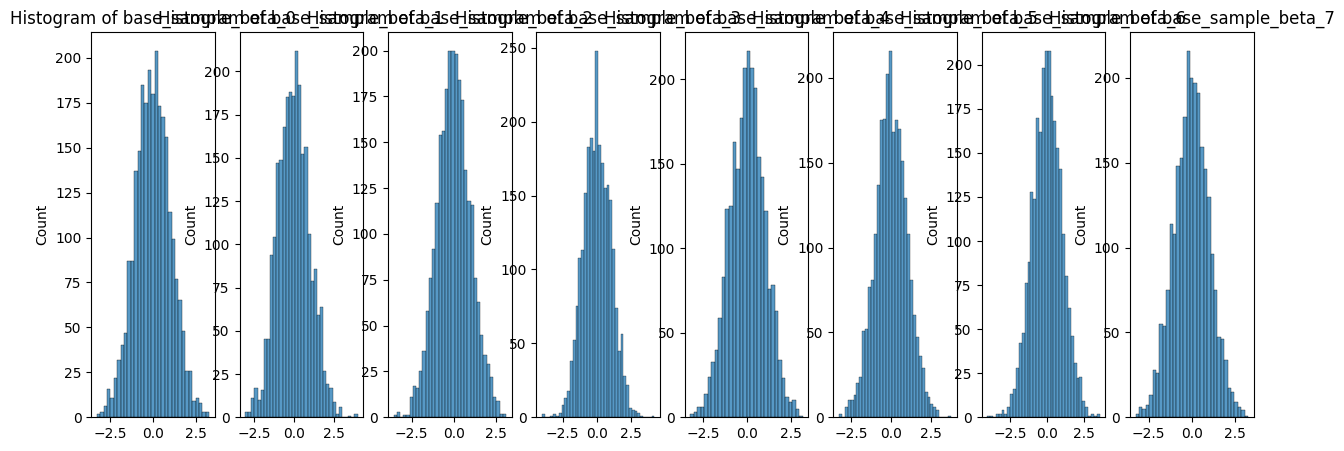

####################################################################################################
Epoch 99


100%|██████████| 10/10 [00:00<00:00, 64.26it/s]

{'X': {'mean': tensor(0.0273), 'variance': tensor(3.2998), 'min': tensor(-26.2617), 'max': tensor(30.0584), 'mean_mean': tensor([0.0273]), 'variance_mean': tensor([2.1224]), 'min_mean': None, 'max_mean': None}, 'beta': {'mean': tensor(0.2554), 'variance': tensor(1.5666), 'min': tensor(-21.2563), 'max': tensor(23.5323), 'mean_mean': tensor(0.2554), 'variance_mean': tensor(1.6368), 'min_mean': None, 'max_mean': None}}
Statistics for phi:


Mean: tensor([0.2457, 0.2435, 0.2586, 0.2521])
Variance: tensor([0.0365, 0.0373, 0.0392, 0.0398])
Min: tensor([1.3507e-04, 4.1299e-04, 3.8496e-05, 4.1833e-04])
Max: tensor([0.9174, 0.9279, 0.9227, 0.9698])
Mean of means: 0.25
Mean of variances: 0.05093879625201225
Mean of minimums: None
Mean of maximums: None


Statistics for mu:
Mean: tensor([-0.0296,  0.0555, -0.0085,  0.0248])
Variance: tensor([2.9444, 3.1304, 2.8144, 3.3024])
Min: tensor([-11.1313, -21.2563, -13.6850, -15.5006])
Max: tensor([ 8.1553, 14.4361, 12.7327, 23.5323])
Mean of means: 0.010514140129089355
Mean of variances: 3.046962261199951
Mean of minimums: None
Mean of maximums: None


Statistics for sigma_squared:
Mean: tensor([0.5000, 0.5049, 0.4981, 0.4981])
Variance: tensor([0.0798, 0.0951, 0.0871, 0.0790])
Min: tensor([0.1142, 0.1341, 0.1334, 0.1233])
Max: tensor([3.5014, 5.0514, 3.6910, 4.0362])
Mean of means: 0.500272274017334
Mean of variances: 0.0855238139629364
Mean of minimums: None
Mean of maximums: None


St

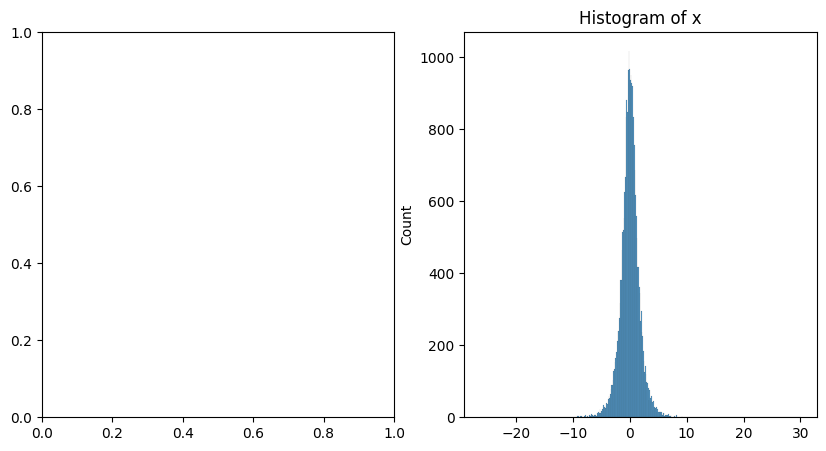

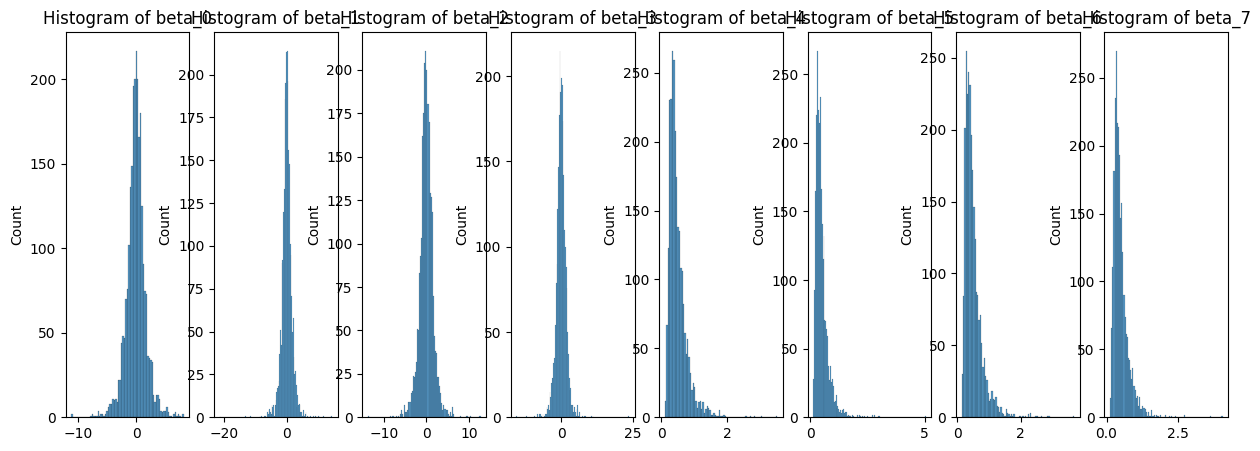

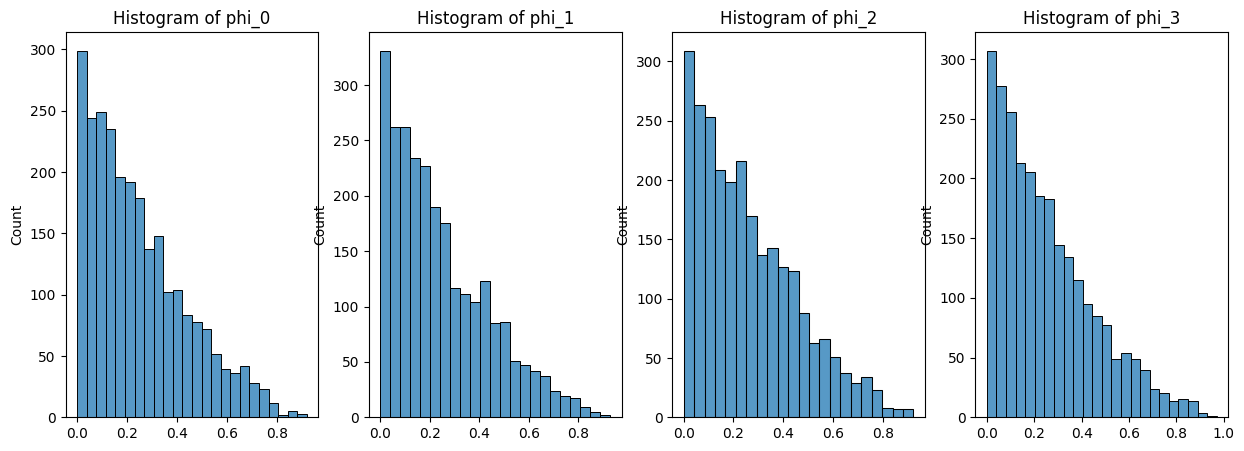

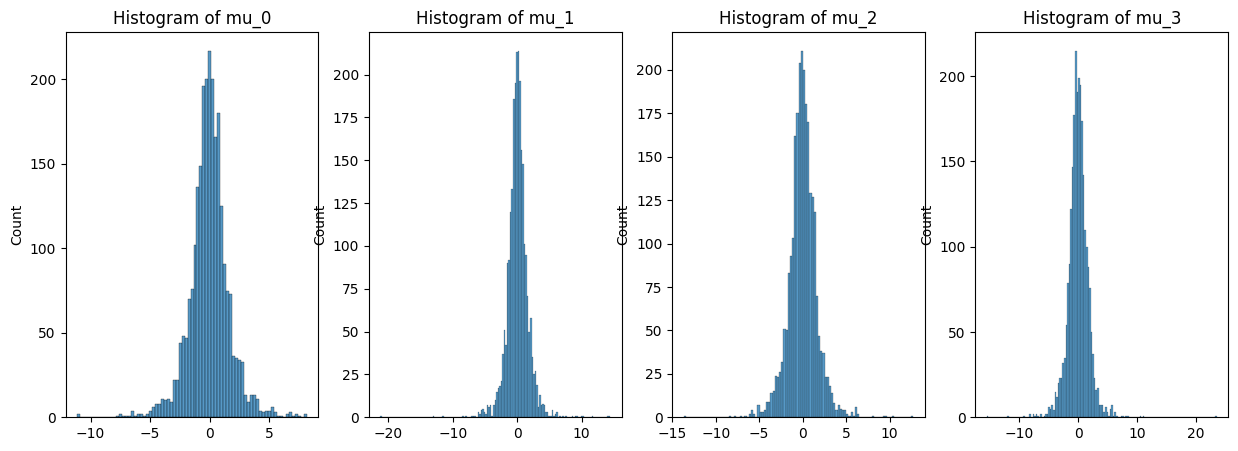

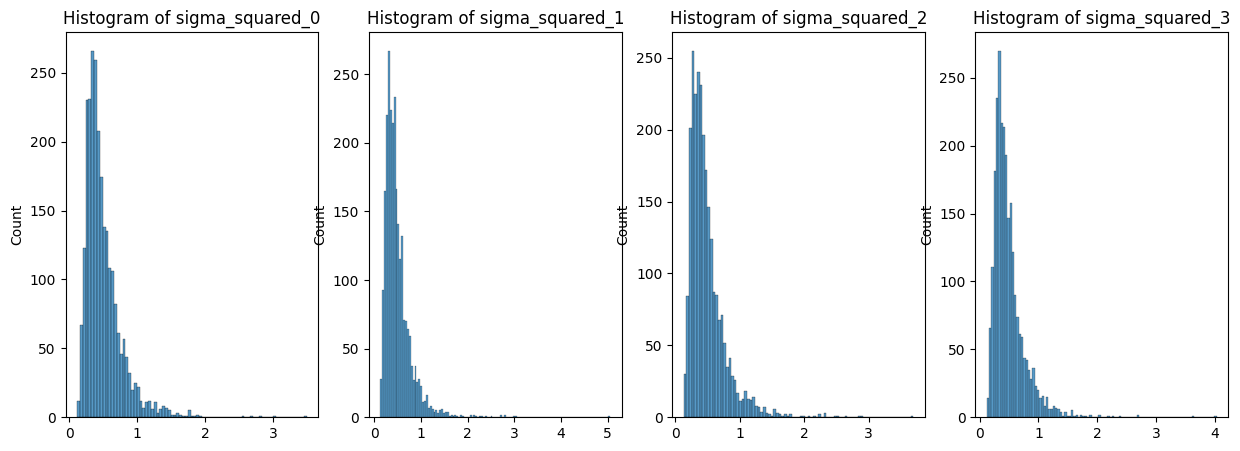

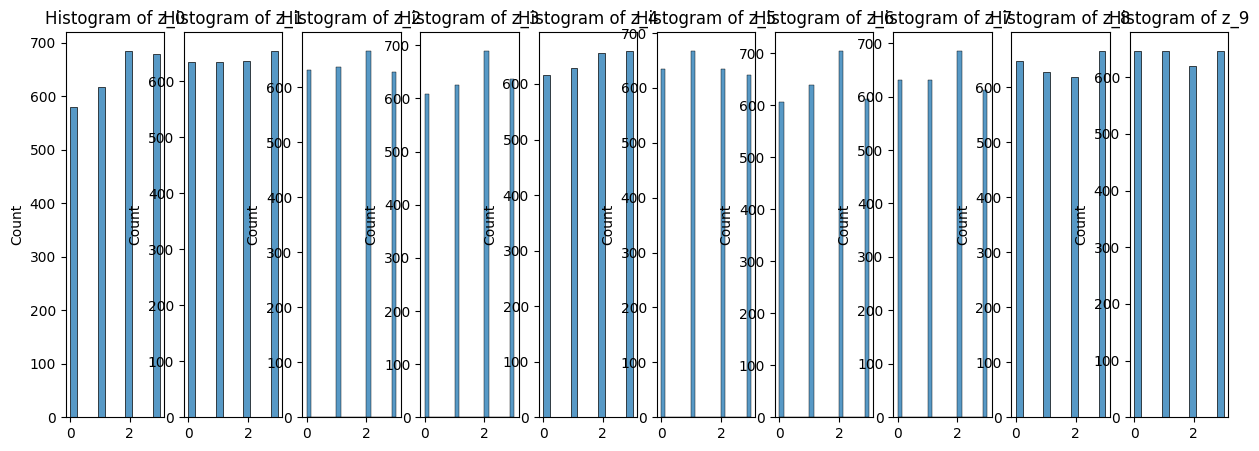

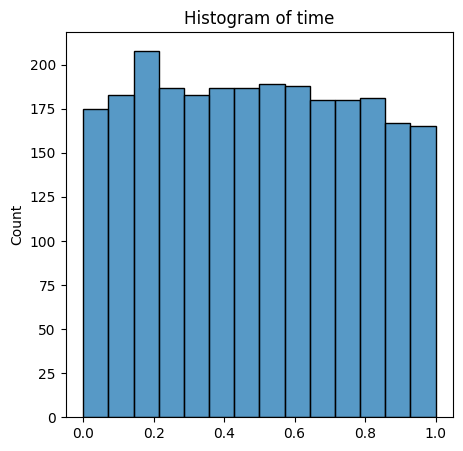

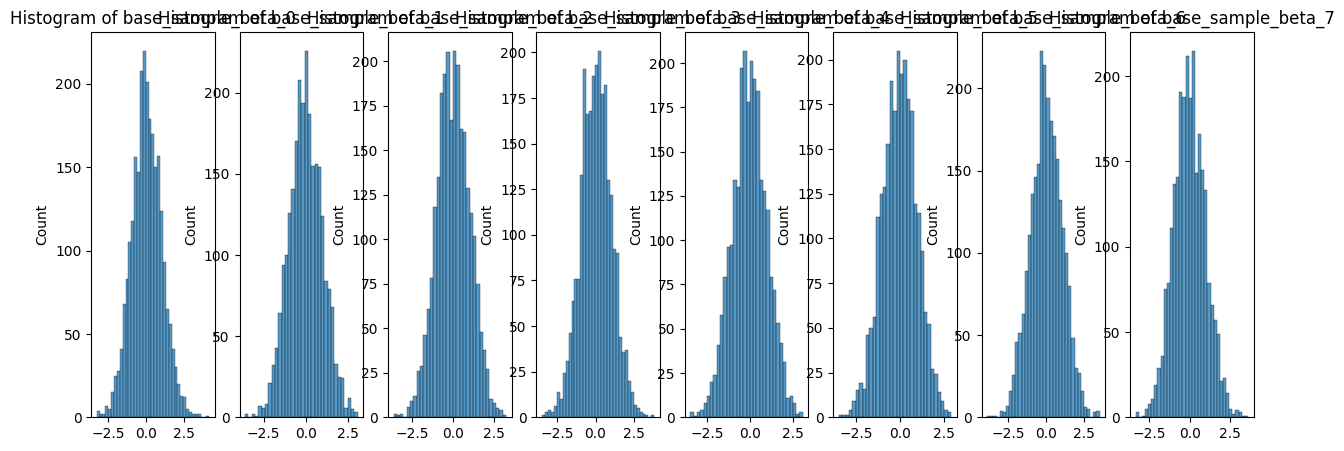

[{'X': {'mean': tensor(0.0021),
   'variance': tensor(3.8027),
   'min': tensor(-16.0052),
   'max': tensor(23.5042),
   'mean_mean': tensor([0.0021]),
   'variance_mean': tensor([2.3597]),
   'min_mean': None,
   'max_mean': None},
  'beta': {'mean': tensor(0.2531),
   'variance': tensor(1.6725),
   'min': tensor(-21.9935),
   'max': tensor(23.9588),
   'mean_mean': tensor(0.2531),
   'variance_mean': tensor(1.7396),
   'min_mean': None,
   'max_mean': None}},
 {'X': {'mean': tensor(0.0273),
   'variance': tensor(3.2998),
   'min': tensor(-26.2617),
   'max': tensor(30.0584),
   'mean_mean': tensor([0.0273]),
   'variance_mean': tensor([2.1224]),
   'min_mean': None,
   'max_mean': None},
  'beta': {'mean': tensor(0.2554),
   'variance': tensor(1.5666),
   'min': tensor(-21.2563),
   'max': tensor(23.5323),
   'mean_mean': tensor(0.2554),
   'variance_mean': tensor(1.6368),
   'min_mean': None,
   'max_mean': None}}]

In [112]:
data_generator.check_model(
    n_samples_per_epoch=N_SAMPLES_PER_EPOCH,
    epochs_to_check = [0, N_EPOCHS-1],
    p = P,
    n = N,
    used_batch_samples = 10
)

In [113]:
epoch_loader = data_generator.make_epoch_loader(
    n = N,
    p = P,
    number_of_batches_per_epoch = N_BATCHES_PER_EPOCH,
    n_epochs = N_EPOCHS,
    batch_size= BATCH_SIZE,
    train_frac= 0.5,
    val_frac= 0.1,
    shuffle=False,
    n_samples_to_generate_at_once = 250_000
)

The number of batches times the number of epochs must be equal to the total number of iterations in the curriculum. But got 49971200 and 24985600 respectively


In [114]:
sample_batch = next(iter(epoch_loader[0][0]))
sample_batch.keys()

dict_keys(['phi', 'mu', 'sigma_squared', 'z', 'x', 'beta', 'time', 'base_sample_beta'])

In [115]:
sample_batch["x"].shape, sample_batch["beta"].shape

(torch.Size([1024, 10, 1]), torch.Size([1024, 8]))

In [140]:
"""
model = TransformerCNFConditionalDecoder(
    n_input_features_encoder = 1,
    n_input_features_decoder = 2*P,
    d_model_encoder = 512,
    d_model_decoder = 512,
    n_heads_encoder = 8,
    n_heads_decoder = 8,
    d_ff_encoder = 1024,
    d_ff_decoder = 1024,
    dropout_encoder = 0.1,
    dropout_decoder = 0.1,
    n_conditional_input_features =  1,
    n_condition_features = 512,
    n_layers_condition_embedding = 3,
    n_layers_encoder = 8,
    n_layers_decoder = 6,
    use_positional_encoding_encoder = True,
    use_positional_encoding_decoder = False,
    use_self_attention_decoder = False,
    output_dim = 2*P,
    d_final_processing = 512,
    n_final_layers = 3,
    dropout_final = 0.1,
    treat_z_as_sequence = False,
)
"""

model = TransformerCNFConditionalDecoder(
    n_input_features_encoder = 1,
    n_input_features_decoder = 2*P,
    d_model_encoder = 16,
    d_model_decoder = 16,
    n_heads_encoder = 1,
    n_heads_decoder = 1,
    d_ff_encoder = 16,
    d_ff_decoder = 16,
    dropout_encoder = 0.1,
    dropout_decoder = 0.1,
    n_conditional_input_features =  1,
    n_condition_features = 16,
    n_layers_condition_embedding = 3,
    n_layers_encoder = 8,
    n_layers_decoder = 6,
    use_positional_encoding_encoder = True,
    use_positional_encoding_decoder = False,
    use_self_attention_decoder = False,
    output_dim = 2*P,
    d_final_processing = 16,
    n_final_layers = 3,
    dropout_final = 0.1,
    treat_z_as_sequence = False,
)

In [141]:
loss_fun = CFMLossOT2(
    sigma_min=1e-4
)

In [142]:
opt = torch.optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-5)
scheduler = OneCycleLR(opt,
                       max_lr = 5e-4,
                       epochs = N_EPOCHS,
                       steps_per_epoch = N_SAMPLES_PER_EPOCH//BATCH_SIZE,
                       pct_start = 0.1,
                       div_factor=25.0,
                       final_div_factor=1e4)

#scheduler = ReduceLROnPlateau(opt)

additional_evals = {
}



In [143]:
trainer = TrainerCurriculumCNF_LatentFactor(
    model = model,
    optimizer=opt,
    scheduler = scheduler,
    loss_function=loss_fun,
    epoch_loader = epoch_loader,
    evaluation_functions= additional_evals,
    n_epochs = N_EPOCHS,
    early_stopping_patience = 200,
    schedule_step_on = "batch",
    save_path = None,
    coupling = None,
    use_same_timestep_per_batch = False,
    use_train_mode_during_validation = False,
    max_gradient_norm = 1.0

)

In [144]:
trainer.validate()

100%|██████████| 49/49 [00:11<00:00,  4.29it/s]


{'loss_mean': 2.9072163105010986,
 'loss_median': 2.8790245056152344,
 'loss_std': 0.10694655776023865}

In [ ]:
r = trainer.train()

In [164]:
full_model = ModelToPosteriorCNF(
    model = model.eval(),
    sample_name = "beta",
    sample_shape = (2*P,),
    n_samples=1000,
    batch_size = BATCH_SIZE,
    solve_adjoint = True,
    atol = 1e-1,
    rtol = 1e-1,
    #device = torch.device("cpu")
)
benchmark_params_ppgrogram = data_generator.curriculum.get_params(-1)
print(f"params for pprogram: {benchmark_params_ppgrogram}")

pprogram1 = make_gmm_program_univariate(**benchmark_params_ppgrogram)

pprogram1_x = return_only_x(pprogram1)



params for pprogram: {'n': 10, 'p': 4, 'batch_size': 1024, 'a1': 5.0, 'b1': 2.0, 'dirichlet_beta': 1.0, 'lambda1': 3.0}


In [165]:
test_batch = next(iter(epoch_loader[0][1]))
x_test = test_batch["x"]

In [166]:
x_test.shape

torch.Size([1024, 10, 1])

In [167]:
full_model.sample_posterior(x_test[0])

0it [00:00, ?it/s]


{'beta': tensor([[ 1.0616, -2.2148, -0.4651,  ...,  0.0492,  1.5049, -1.4445],
         [-1.7075, -0.7952,  0.1569,  ...,  0.8467,  0.4665,  0.0523],
         [ 1.1595,  1.2317, -0.8892,  ...,  1.0583, -0.5955,  0.5269],
         ...,
         [ 0.8436,  0.1446,  1.0613,  ...,  0.5522, -1.3369, -0.5961],
         [-0.4300,  0.2036,  0.2639,  ..., -1.0813,  0.6198, -2.7971],
         [-0.6520, -1.3446, -0.8982,  ...,  0.9041, -0.0922, -0.8330]],
        grad_fn=<CatBackward0>),
 'X': tensor([[ 0.3670],
         [ 0.0574],
         [-0.4269],
         [-0.0816],
         [ 0.3386],
         [-0.2292],
         [ 0.7006],
         [-0.5392],
         [ 0.0877],
         [-0.0179]]),
 'y': None}

In [168]:
hmc = Hamiltionian_MC(
    pprogram=pprogram1_x,
    n_samples=500,
    n_warmup=500
)

In [171]:
evaluation = Evaluate(
    posterior_model = full_model,
    evaluation_loader = trainer.testset,
    comparison_models= [
                        #analytical_solution,
                       hmc
                        ],
    n_evaluation_cases=3,
    save_path= None,
    overwrite_results = True,
    results_dict_to_data_for_model = results_dict_to_data_x_tuple,
    results_dict_to_latent_variable_comparison_models= result_dict_to_latent_variable_convert_mu_sigma_to_beta
)

In [172]:
evaluation.run_evaluation()


0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]
Sampling posterior:   0%|          | 0/3 [00:00<?, ?it/s]


IndexError: tuple index out of range